<img src="https://raw.githubusercontent.com/gsprint23/GEL-Weekend-DS-ML/master/pics/GU_CS.png" width="1000"/>

# 🥳 Gonzaga GEL Weekend 2022 🥳
## 😎 Data Science and Machine Learning w/Python 😎
### Welcome, I'm glad you are all here!! 

First, can you please fill out my Google Form here so I know a little bit about you and whether you are a Cat 😸 or Dog 🐶 Person: https://forms.gle/LZeFzCXVBrzcasKAA
<img src="https://raw.githubusercontent.com/gsprint23/GEL-Weekend-DS-ML/master/pics/qrcode.png" width="500"/>


Second, here is my info:
* Dr. Gina Sprint, Assistant Professor of [Computer Science](https://www.gonzaga.edu/school-of-engineering-applied-science/degrees-and-programs/computer-science)
    * Faculty webpage: https://cs.gonzaga.edu/faculty/sprint/
    * Email: sprint@gonzaga.edu

Third, here is the info about this "sample" course:
* Link to this Jupyter Notebook: https://github.com/gsprint23/GEL-Weekend-DS-ML/blob/master/GELNotebook.ipynb
    * A [Jupyter Notebook](https://jupyter.org/) is a development environment that combines narrative with computation to tell a [data science story](https://www.dataquest.io/blog/data-science-portfolio-project/)
* Topics related to GU courses:
    * [CPSC 222 Introduction to Data Science w/Python](https://github.com/GonzagaCPSC222)
    * [CPSC 322: Data Science Algorithms w/Python](https://github.com/GonzagaCPSC322)
* Topics we are going to touch on:
    1. Data collection
    1. Exploratory data analysis
    1. Machine learning for prediction

## 🤓 1) Data Collection 🤓
* Crowd sourced from you via your Google Form responses!!
* Demos will be based on current responses plus responses from current GU students in my CPSC 322 courses
    * How? I wrote code to connect to Google Drive via its "API"
    * Learn more about APIs [here](https://github.com/GonzagaCPSC222/U7-APIs-NLP)

In [1]:
import pandas as pd
from google_sheet_api import get_spreadsheet_dataframe

orig_df = get_spreadsheet_dataframe()
n = orig_df.shape[0]
print(n, "responses to the Google Form currently received\n")

print("Preview of the most recent three responses in the data")
for i in range(n - 3, n, 1):
    print("Response #" + str(i) + ":", orig_df.iloc[i].values, "\n")
    
print("Quick stats based on the data")
orig_df.describe()

101 responses to the Google Form currently received

Preview of the most recent three responses in the data
Response #98: ['4/9/2022 14:04:20' 'John' '' '' 'Introverted' 'Non-conformist' 'Yes'
 'Yes' 'Dog-person'] 

Response #99: ['4/9/2022 14:04:25' 'Hoffman Nguyen' '' '' 'Introverted' 'Rule-follower'
 'No' 'Yes' 'Dog-person'] 

Response #100: ['4/9/2022 14:05:19' 'Gavin'
 'The energy at Gonzaga looks unmatched to anything I’ve seen before. The education and teachings I’ve heard was phenomenal. Finally, I live across the state so I want to explore on my own.'
 '' 'Extroverted' 'Non-conformist' 'No' 'Yes' 'Dog-person'] 

Quick stats based on the data


,Timestamp,(optional) What is your first name (or a fun screen name)?,(optional) Why were/are you interested in attending Gonzaga?,"(optional, for current GU students) What is your favorite part of attending Gonzaga?",Do you consider yourself more introverted or extroverted?,Do you consider yourself more of a rule-follower or a non-conformist?,Do you consider yourself a creative person?,Do you consider yourself an energetic person?,Do you consider yourself more of a cat-person or a dog-person?
count,101,101,101,101,101,101,101,101,101
unique,96,72,60,42,2,2,2,2,2
top,3/3/2022 10:54:20,,,,Introverted,Rule-follower,Yes,Yes,Dog-person
freq,2,21,41,59,72,65,65,61,74


## 🧐 2) Exploratory Data Analysis 🧐
A first step when working with new data... explore it!

### Explore the Google Form Questions/Responses (Called "Attributes")

In [2]:
print("Any missing data?")
for i, col in enumerate(orig_df.columns):
    print("Attribute #" + str(i) + ":", col)
    value_counts = orig_df[col].value_counts()
    if "" in value_counts:
        print("\tNumber of missing values:", value_counts[""])

Any missing data?
Attribute #0: Timestamp
Attribute #1: (optional) What is your first name (or a fun screen name)? 
	Number of missing values: 21
Attribute #2: (optional) Why were/are you interested in attending Gonzaga?
	Number of missing values: 41
Attribute #3: (optional, for current GU students) What is your favorite part of attending Gonzaga?
	Number of missing values: 59
Attribute #4: Do you consider yourself more introverted or extroverted?
Attribute #5: Do you consider yourself more of a rule-follower or a non-conformist?
Attribute #6: Do you consider yourself a creative person?
Attribute #7: Do you consider yourself an energetic person?
Attribute #8: Do you consider yourself more of a cat-person or a dog-person?


### Explore Attribute #2: Why People Want to Attend Gonzaga

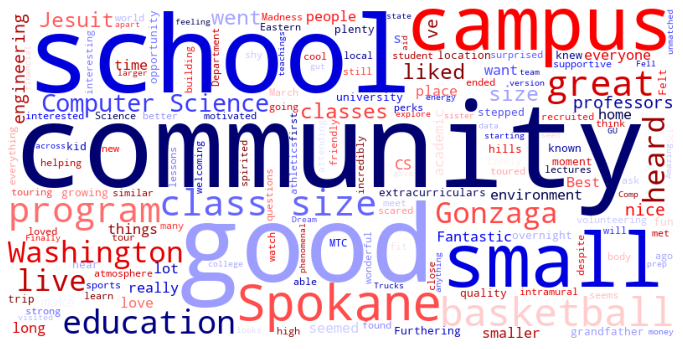

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ""
plt.figure(figsize=(12, 7))
for response in orig_df['(optional) Why were/are you interested in attending Gonzaga?']:
    if response != "":
        text += response + " "
word_cloud = WordCloud(width=800, height=400, background_color="white", colormap="seismic").generate(text)
plt.axis("off")
plt.imshow(word_cloud);

### Explore Attribute #3: Current GU Students' Favorite Part of Attending GU

In [4]:
for i in range(27): # first 27 responses are from current GU students in my CPSC 322 course
    response = orig_df.loc[i, '(optional, for current GU students) What is your favorite part of attending Gonzaga?']
    if response != "":
        print("Response #" + str(i) +":", response)

Response #0: The friends I've made since freshman year
Response #1: Great environment
Response #4: small classes and some of the really good classes (many in honors)
Response #5: community
Response #6: The people and the opportunities to grow
Response #7: The People
Response #8: Hanging out with the friends I made
Response #9: Meeting a lot of really good friends
Response #11: the people
Response #12: Professors
Response #15: tight bonds with professors
Response #16: The Kennel
Response #18: teachers and students know each other
Response #19: Tons of great people!
Response #20: The community. So many great people here (even if there are some idiots who burn couches and etc.)
Response #22: I've met a lot of amazing people,  I've able to study all kinds of important and interesting things, and I've gotten the chance to get involved with lots of fun clubs and organizations. 
Response #23: The classes and professors are great
Response #24: Professors are very supportive. It's a smaller sch

### Relationships between Attributes #4-7, and Attribute #8 (Cat 😸 or Dog 🐶 Person)?
From [Wikipedia](https://en.wikipedia.org/wiki/Cat_people_and_dog_people):
> The terms dog people and cat people refer to a person's domesticated pet animal preference. Through research completed at University institutions it was found that there were differences in character and behaviour between dog and cat people.

Based on the research, I put four questions (attributes #4-7) in the Google Form that are supposedly "predictive" of whether someone is a "Cat" or "Dog" person. Let's take a look!

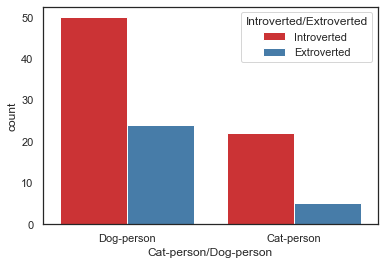

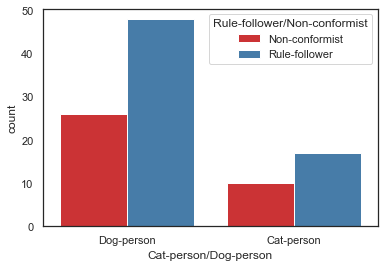

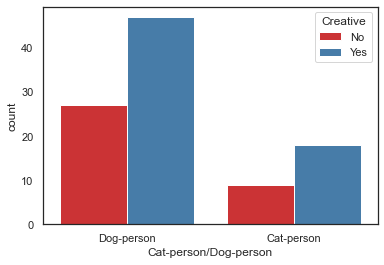

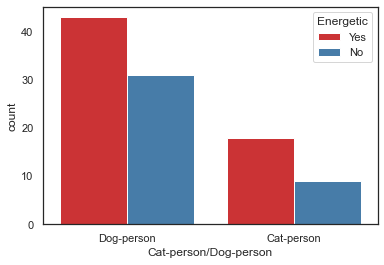

In [5]:
import seaborn as sns
sns.set(style="white", palette="Set1")

# get rid of attributes #0-3, they are not informative for predicting cat vs dog person
df = orig_df.drop(['Timestamp',
       '(optional) What is your first name (or a fun screen name)? ',
       '(optional) Why were/are you interested in attending Gonzaga?',
       '(optional, for current GU students) What is your favorite part of attending Gonzaga?'], axis=1)
df.columns =["Introverted/Extroverted", "Rule-follower/Non-conformist", "Creative", "Energetic", "Cat-person/Dog-person"]

for col in df.columns[:-1]:
    plt.figure()
    sns.countplot(x="Cat-person/Dog-person", hue=col, data=df)

## 🤩 3) Machine Learning for Prediction 🤩
Can we make Cat 😸 or Dog 🐶 Person predictions from your data?
* In machine learning, classification involves learning relationships between attributes
* The goal is to predict one of the attributes, called the "class" attribute for new data points
    * What is the distribution of our class attribute, Cat 😸 or Dog 🐶 Person?

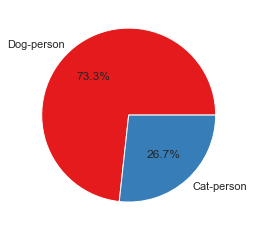

In [6]:
class_distribution = df["Cat-person/Dog-person"].value_counts()
plt.pie(class_distribution, labels=class_distribution.index, autopct="%1.1f%%");

**Question: Do we have "equal" class distribution?** 

### What Machine Learning Model are we going to use for Prediction?
* The model we will build to predict cat vs dog person is called a [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning)
* You've seen/used decision trees before!! Think flow charts!!
* Example:

<img src="https://i.pinimg.com/originals/55/cc/a7/55cca7c380856eb2300caf24fd95097c.jpg" width="400"/>

(image source: https://www.pinterest.com/pin/313422455294362957/)

**Question: how many "classes" are there in this "decision tree"?**

### Build the Cat/Dog Person Decision Tree!!
First, divide the data into "train" and "test" sets
* Train data will be used to build the tree
* Test data will be used to see how good the tree is (e.g. make predictions for new datapoints)
* I'm going to hold-out 5 random responses for testing later

Now, we can programmatically build the tree with the training data 😎

In [7]:
from sklearn.model_selection import train_test_split
import mysklearn.myclassifiers
import importlib
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyDecisionTreeClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5, stratify=y, random_state=0)
myclf = MyDecisionTreeClassifier()
myclf.fit(X_train.values.tolist(), y_train.values.tolist())
myclf.visualize_tree("tree.dot", "tree.png", attribute_names=df.columns)

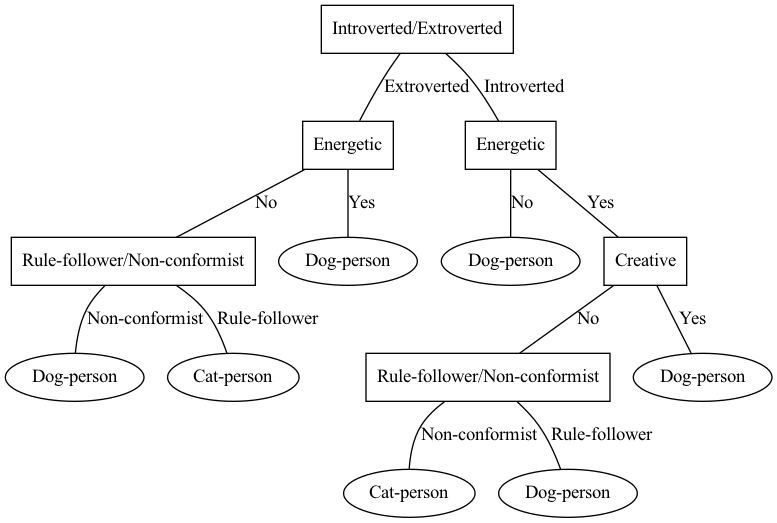

In [8]:
# from wand.image import Image as WImage
# img = WImage(filename='tree.pdf')
from IPython import display
display.Image("tree.png")

### Use the Tree to Make Predictions!!
Let's try it... **Question: What is the class prediction for the following test respondent?**

In [9]:
print("Attribute order: Introverted/Extroverted, Rule-follower/Non-conformist, Creative?, Energetic?")
print("Test Response #0:", orig_df.loc[X_test.index[0], '(optional) What is your first name (or a fun screen name)? '] + "'s", end="")
print(" responses:", X_test.iloc[0,].values, "=> ??")

Attribute order: Introverted/Extroverted, Rule-follower/Non-conformist, Creative?, Energetic?
Test Response #0: Vickers's responses: ['Extroverted' 'Non-conformist' 'Yes' 'Yes'] => ??


In [10]:
y_predicted = myclf.predict(X_test.values.tolist())
for i in range(len(X_test)):
    print("Test Response #" + str(i) + ":", orig_df.loc[X_test.index[i], '(optional) What is your first name (or a fun screen name)? '] + "'s", end="")
    print(" responses:", X_test.iloc[i,].values, "=> ??")
    print("\tPredicted class =>", y_predicted[i])
    print("\tActual class:", y_test.iloc[i,])
    print("\t\tPrediction correct? ", y_predicted[i] == y_test.iloc[i])

Test Response #0: Vickers's responses: ['Extroverted' 'Non-conformist' 'Yes' 'Yes'] => ??
	Predicted class => Dog-person
	Actual class: Dog-person
		Prediction correct?  True
Test Response #1: 's responses: ['Introverted' 'Rule-follower' 'No' 'Yes'] => ??
	Predicted class => Dog-person
	Actual class: Cat-person
		Prediction correct?  False
Test Response #2: 's responses: ['Introverted' 'Rule-follower' 'Yes' 'No'] => ??
	Predicted class => Dog-person
	Actual class: Dog-person
		Prediction correct?  True
Test Response #3: 's responses: ['Extroverted' 'Rule-follower' 'Yes' 'Yes'] => ??
	Predicted class => Dog-person
	Actual class: Dog-person
		Prediction correct?  True
Test Response #4: Matt's responses: ['Introverted' 'Non-conformist' 'Yes' 'No'] => ??
	Predicted class => Dog-person
	Actual class: Dog-person
		Prediction correct?  True


**Question: What is the prediction accuracy of our decision tree classifier? Was it better than our baseline?**

## 😍 Thank You!! 😍
* Questions about anything and everything GU/CS related??

![](https://wpcdn.us-east-1.vip.tn-cloud.net/www.kxly.com/content/uploads/2019/12/gonzaga-bulldogs-gu-zags-png_39567159_ver1-0.jpg)